# Explainable AI

We will try to figure out which columns had the biggest impact on the output, in general and in some specific cases.

In [1]:
import warnings
warnings.simplefilter('ignore')

import random
import pickle
import shap
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()
sns.set_palette('bright')

In [2]:
X_train = pd.read_csv('..\data_files\X_train.csv').drop('Unnamed: 0', axis=1)
y_train = pd.read_csv('..\data_files\y_train.csv').drop('Unnamed: 0', axis=1)
X_test = pd.read_csv('..\data_files\X_test.csv').drop('Unnamed: 0', axis=1)
y_test = pd.read_csv('..\data_files\y_test.csv').drop('Unnamed: 0', axis=1)

In [3]:
file = open(f'../models/pickled/optimized_xgbregressor.pickle', 'rb')
xgbregressor = pickle.load(file)
file.close()

Text(0.5, 1.0, 'Importance of features')

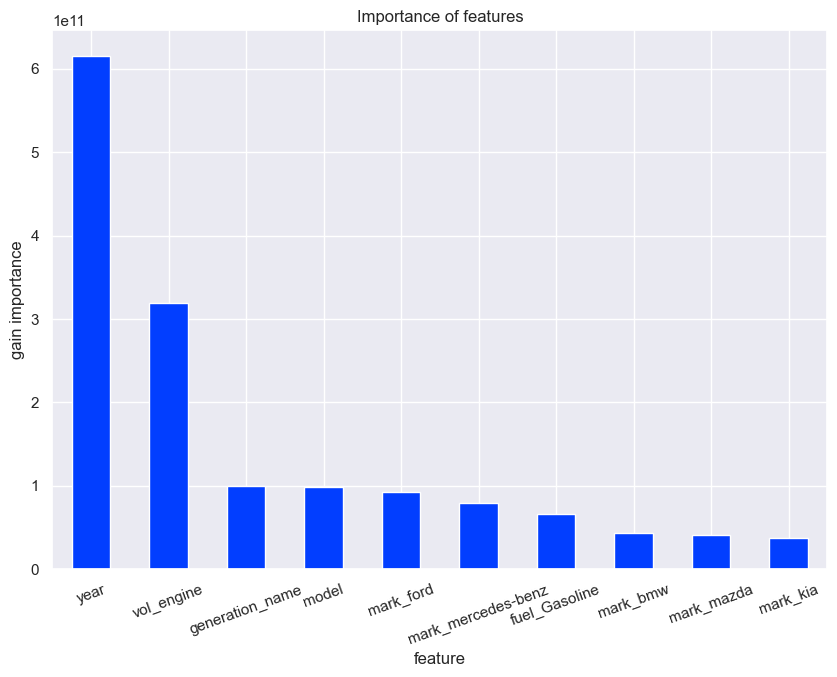

In [4]:
f_importance = pd.Series(xgbregressor.get_booster().get_score(importance_type='gain'))
plt.figure(figsize=(10,7))
f_importance.sort_values(ascending=False).head(10).plot(kind='bar', rot=20)
plt.xlabel("feature")
plt.ylabel("gain importance")
plt.title("Importance of features")

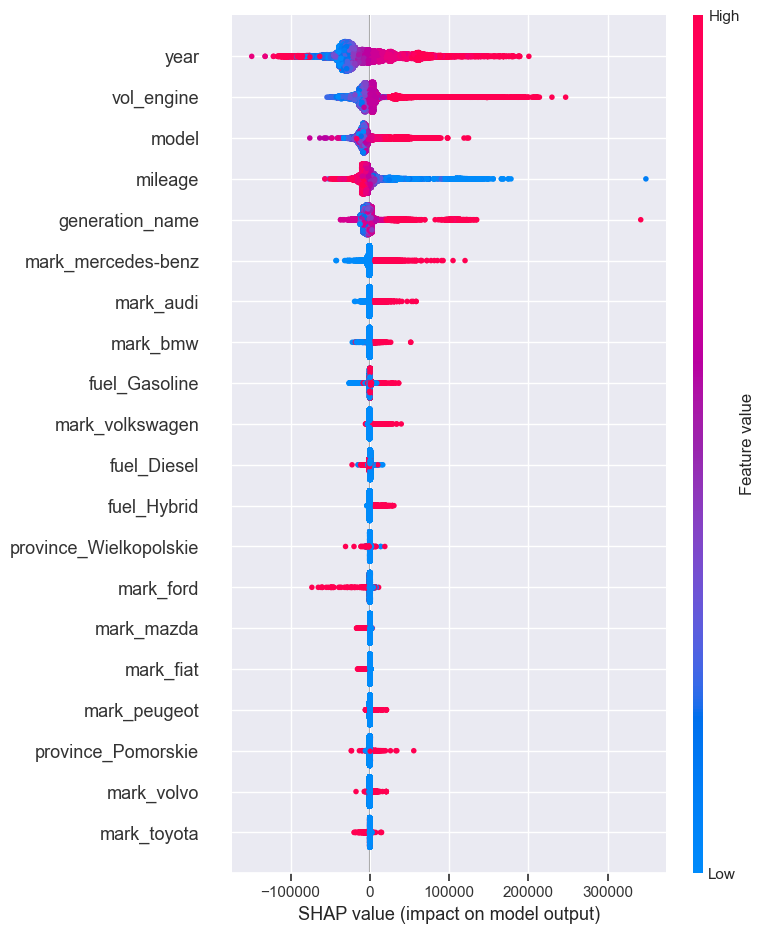

In [5]:
y_test_pred = xgbregressor.predict(X_test)
explainer = shap.TreeExplainer(xgbregressor)
shap_values = explainer.shap_values(X_test)
shap.summary_plot(shap_values, X_test)

The year of production of a car seems to be the most important variable when predicting the price. Other features that had a significant impact on the value of a car were the engine volume, mileage, mark and type of fuel.

Now let's see which features influence the output the most in sample observations.

In [6]:
explainer = shap.Explainer(xgbregressor, X_test)
shap_values = explainer(X_test)

100%|===================| 23520/23586 [01:26<00:00]        

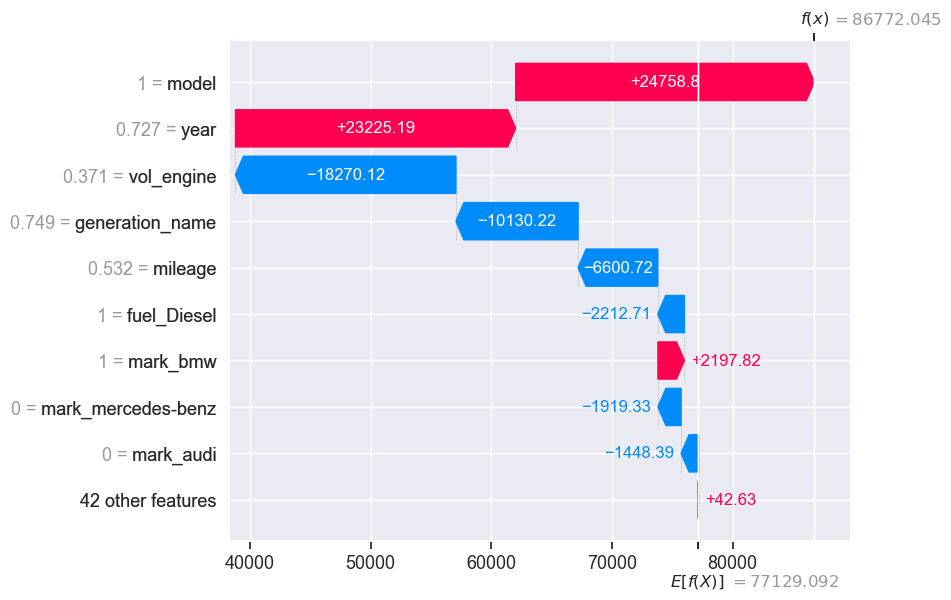

Actual price: price    64999
Name: 1715, dtype: int64


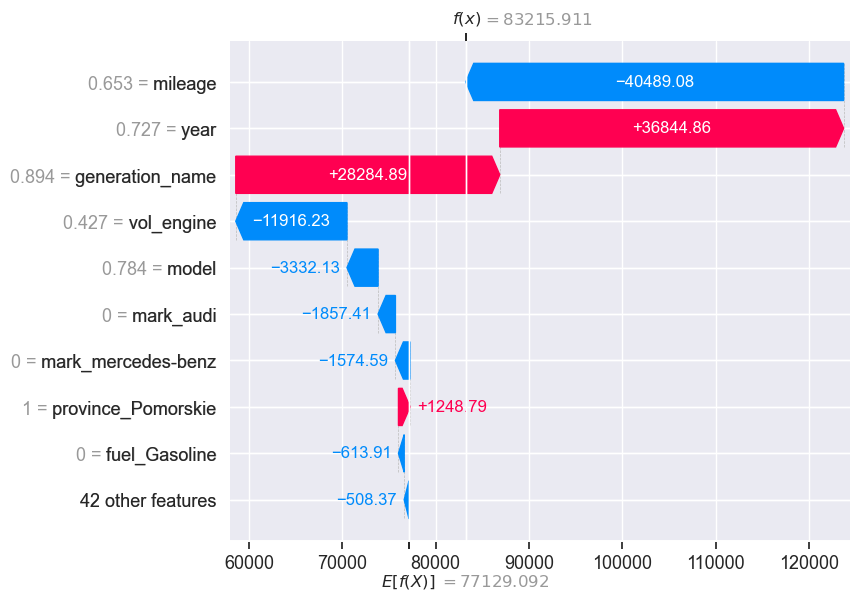

Actual price: price    96900
Name: 8771, dtype: int64


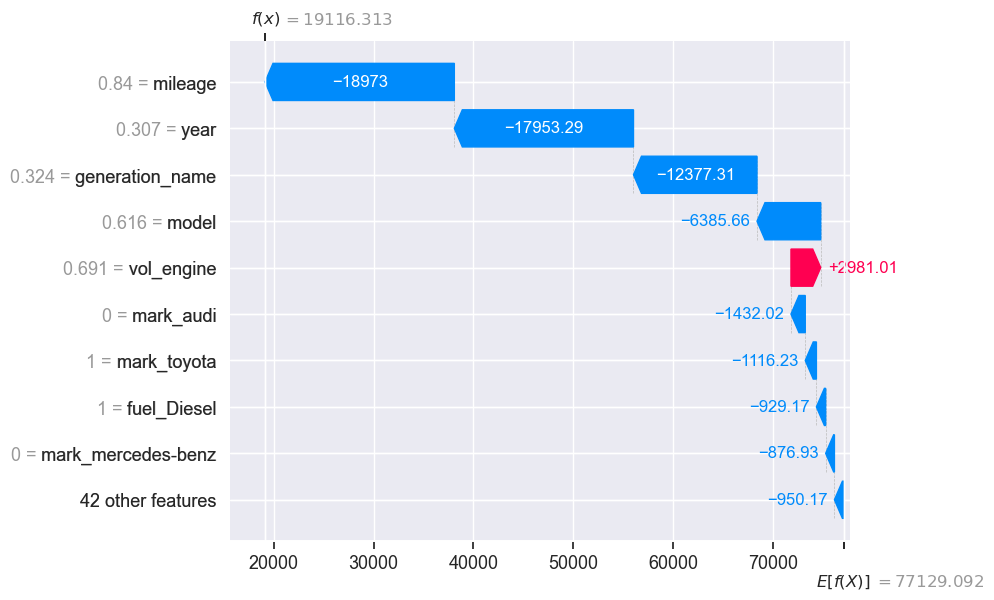

Actual price: price    14900
Name: 2856, dtype: int64


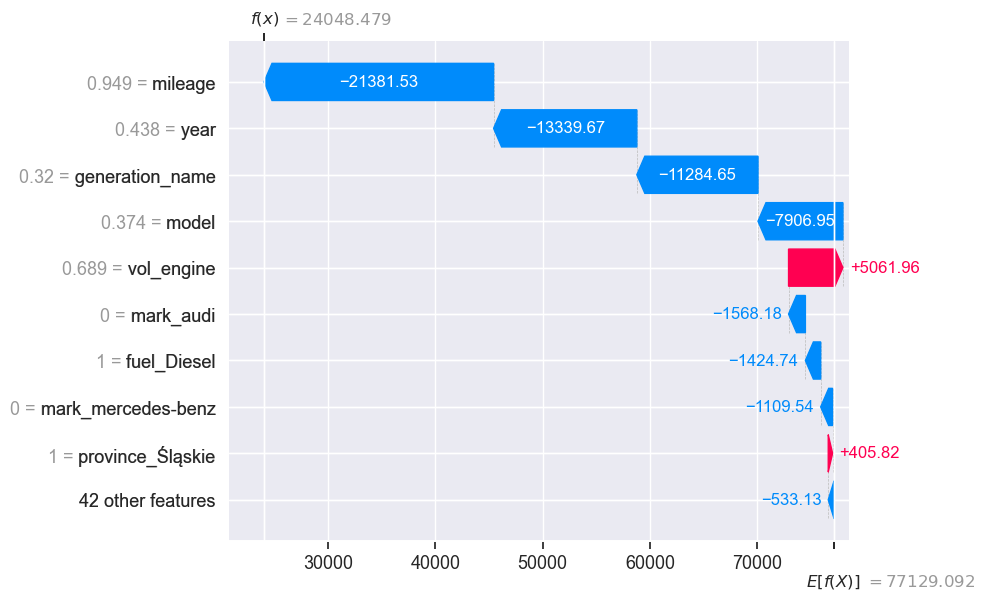

Actual price: price    22990
Name: 13344, dtype: int64


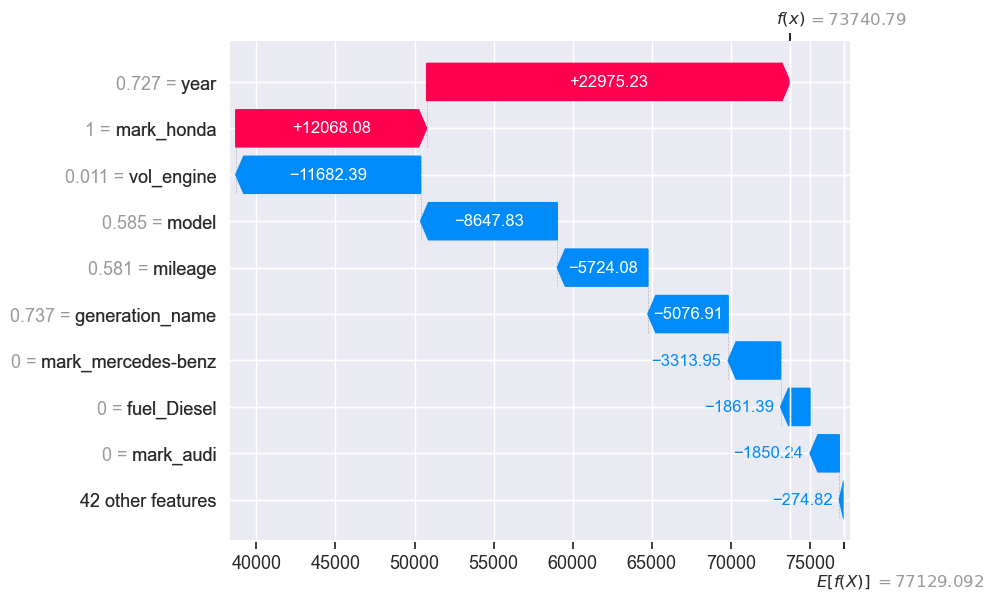

Actual price: price    59999
Name: 8734, dtype: int64


In [7]:
random.seed(123)
sample_idx = [random.randint(0, len(X_test)) for _ in range(5)]

for i in sample_idx:
    shap.plots.waterfall(shap_values[i])
    print(f"Actual price: {y_test.iloc[i]}")